In [1]:
!pip install pandas matplotlib seaborn numpy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']]
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths,population
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,41128772
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,41128772
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,41128772
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,41128772
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,41128772


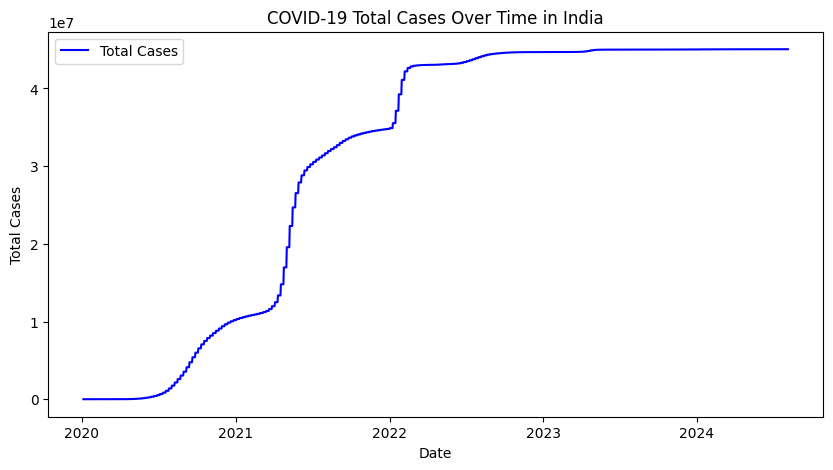

In [5]:
#Total cases over time (India)
india_data = df[df['location'] == 'India']

plt.figure(figsize=(10, 5))
plt.plot(india_data['date'], india_data['total_cases'], label="Total Cases", color='blue')
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("COVID-19 Total Cases Over Time in India")
plt.legend()
plt.show()

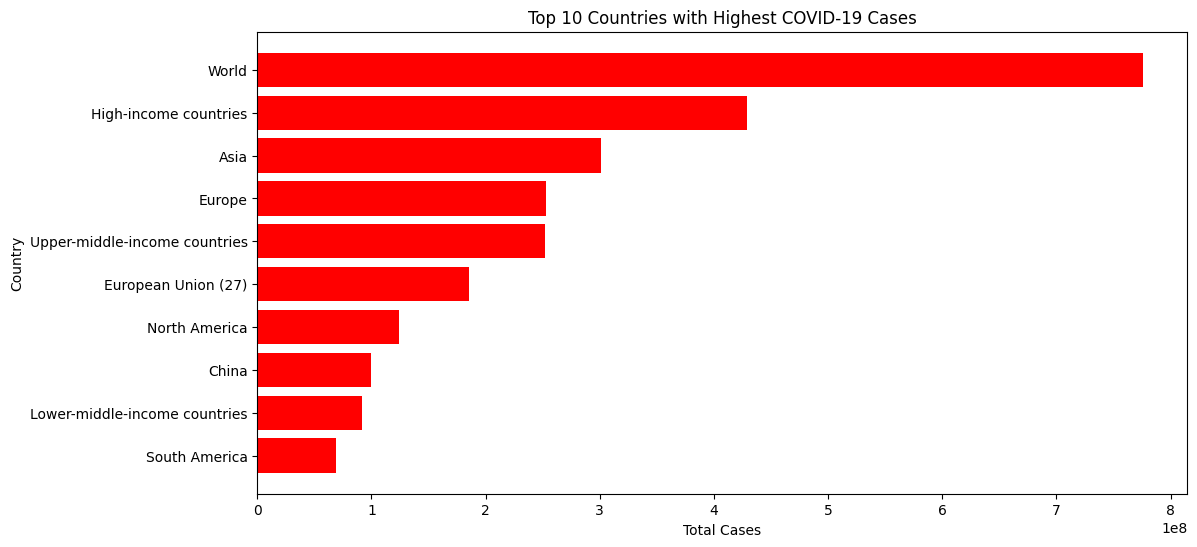

In [8]:
# Top 10 Countries with Highest Cases
latest_data = df[df['date'] == df['date'].max()]
top_countries = latest_data.nlargest(10, 'total_cases')

plt.figure(figsize=(12, 6))
plt.barh(top_countries['location'], top_countries['total_cases'], color='red')
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.gca().invert_yaxis()
plt.show()


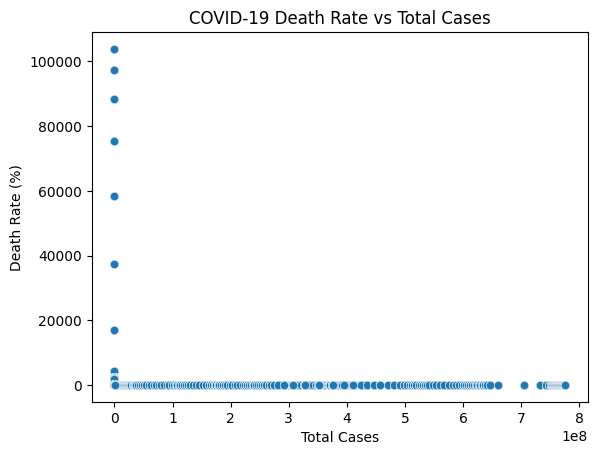

In [9]:
#COVID-19 Death Rate Analysis
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
sns.scatterplot(x='total_cases', y='death_rate', data=df, alpha=0.5)
plt.xlabel("Total Cases")
plt.ylabel("Death Rate (%)")
plt.title("COVID-19 Death Rate vs Total Cases")
plt.show()